<a href="https://colab.research.google.com/github/johnatanDM/MachineLearning/blob/main/Alura_Introdu%C3%A7%C3%A3o_a_Machine_Learning_Otimiza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install graphviz==0.9
!pip install pydot

!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [32]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [33]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [34]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np
SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [49.79, 53.45]


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [35]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [36]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [37]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [38]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

In [39]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [40]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


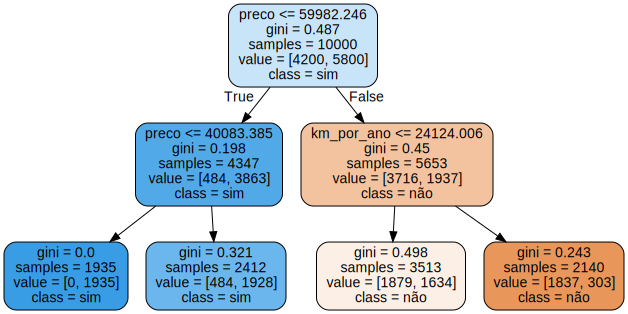

In [41]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names=features)

graph = graphviz.Source(dot_data)
graph

In [42]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


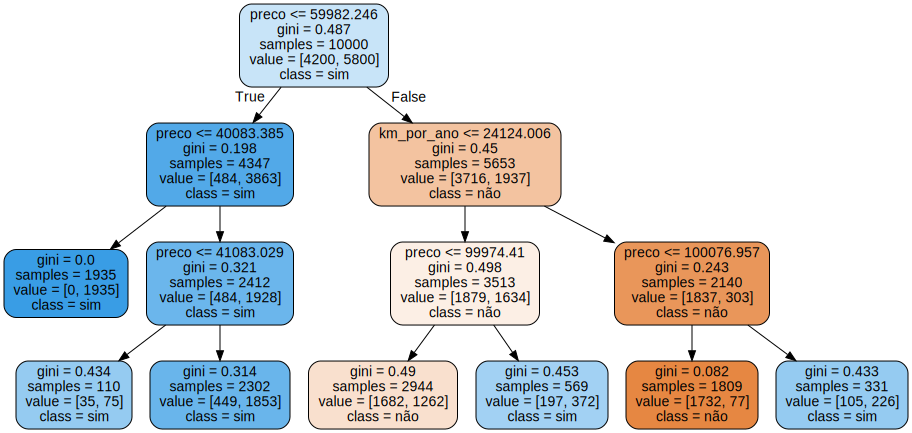

In [43]:
modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names=features)

graph = graphviz.Source(dot_data)
graph

In [44]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


In [45]:
#testando parametros
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("max_depth = %d, media teste = %.2f, media treino = %.2f" % (max_depth, test_score, train_score))
  tabela = [max_depth, train_score, test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range(1,33)] 
resultados = pd.DataFrame(resultados, columns=["max_depth", "train", "test"])
resultados.head()

max_depth = 1, media teste = 75.78, media treino = 75.79
max_depth = 2, media teste = 75.78, media treino = 75.79
max_depth = 3, media teste = 78.67, media treino = 78.75
max_depth = 4, media teste = 78.63, media treino = 78.79
max_depth = 5, media teste = 78.56, media treino = 78.94
max_depth = 6, media teste = 78.12, media treino = 79.17
max_depth = 7, media teste = 77.96, media treino = 79.50
max_depth = 8, media teste = 77.86, media treino = 79.89
max_depth = 9, media teste = 77.38, media treino = 80.46
max_depth = 10, media teste = 77.19, media treino = 81.16
max_depth = 11, media teste = 76.97, media treino = 82.03
max_depth = 12, media teste = 76.49, media treino = 82.89
max_depth = 13, media teste = 75.81, media treino = 83.95
max_depth = 14, media teste = 75.66, media treino = 85.03
max_depth = 15, media teste = 75.16, media treino = 86.14
max_depth = 16, media teste = 75.11, media treino = 87.19
max_depth = 17, media teste = 74.74, media treino = 88.31
max_depth = 18, media t

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


In [46]:
import seaborn as sns

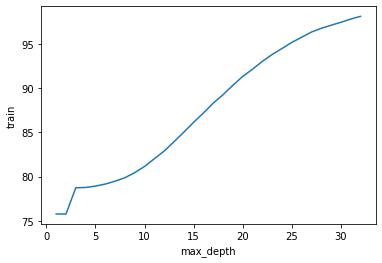

In [47]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)

Overfit

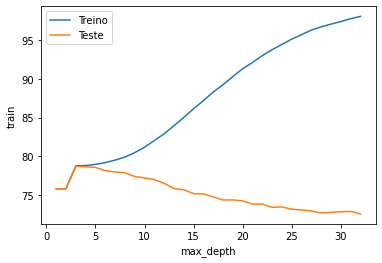

In [48]:
import matplotlib.pyplot as plt
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

In [49]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


In [54]:
#testando hiper parametros 2 dimensões
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("max_depth = %d, min_sample_leaf = %d, media teste = %.2f, media treino = %.2f" % (max_depth, min_samples_leaf, test_score, train_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "train", "test"])
  return resultados
resultados = busca()
resultados.head()

max_depth = 1, min_sample_leaf = 32, media teste = 75.78, media treino = 75.79
max_depth = 1, min_sample_leaf = 64, media teste = 75.78, media treino = 75.79
max_depth = 1, min_sample_leaf = 128, media teste = 75.78, media treino = 75.79
max_depth = 1, min_sample_leaf = 256, media teste = 75.78, media treino = 75.79
max_depth = 2, min_sample_leaf = 32, media teste = 75.78, media treino = 75.79
max_depth = 2, min_sample_leaf = 64, media teste = 75.78, media treino = 75.79
max_depth = 2, min_sample_leaf = 128, media teste = 75.78, media treino = 75.79
max_depth = 2, min_sample_leaf = 256, media teste = 75.78, media treino = 75.79
max_depth = 3, min_sample_leaf = 32, media teste = 78.67, media treino = 78.75
max_depth = 3, min_sample_leaf = 64, media teste = 78.67, media treino = 78.75
max_depth = 3, min_sample_leaf = 128, media teste = 78.67, media treino = 78.75
max_depth = 3, min_sample_leaf = 256, media teste = 78.67, media treino = 78.75
max_depth = 4, min_sample_leaf = 32, media tes

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [55]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [59]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000,0.000000,0.536705,-0.027675
min_samples_leaf,0.000000,1.000000,-0.409676,0.349011
train,0.536705,-0.409676,1.000000,0.116466
test,-0.027675,0.349011,0.116466,1.000000


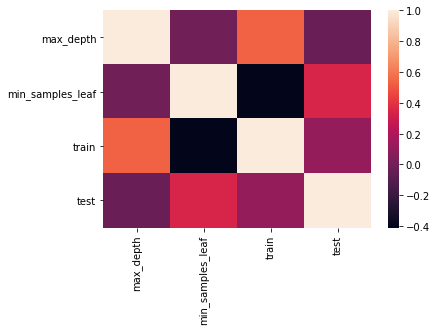

In [60]:
sns.heatmap(corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f6c63f410>,
      dtype=object)

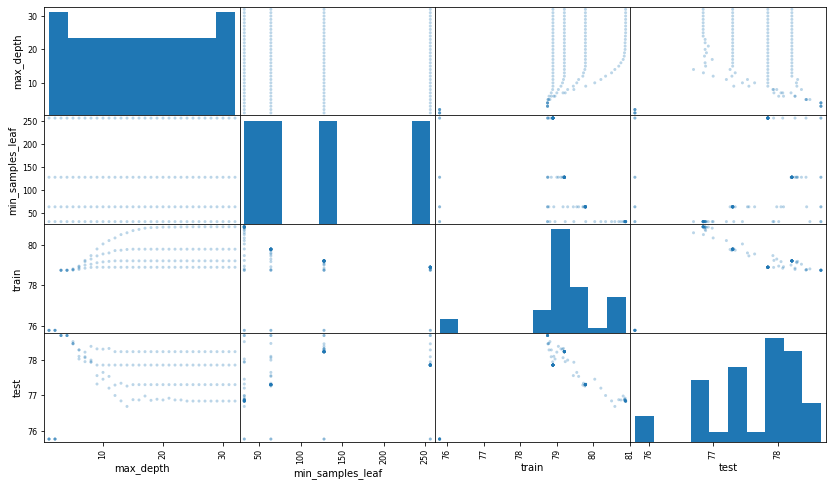

In [66]:
pd.plotting.scatter_matrix(resultados, figsize=(14,8), alpha=0.3)

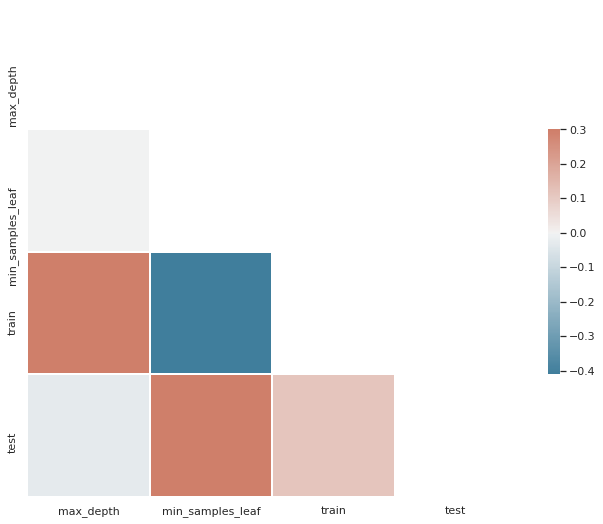

In [67]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [68]:

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "train", "test"])
  return resultados
resultados = busca()
resultados.head()

max_depth = 1, min_sample_leaf = 128, media teste = 75.78, media treino = 75.79
max_depth = 1, min_sample_leaf = 192, media teste = 75.78, media treino = 75.79
max_depth = 1, min_sample_leaf = 256, media teste = 75.78, media treino = 75.79
max_depth = 1, min_sample_leaf = 512, media teste = 75.78, media treino = 75.79
max_depth = 2, min_sample_leaf = 128, media teste = 75.78, media treino = 75.79
max_depth = 2, min_sample_leaf = 192, media teste = 75.78, media treino = 75.79
max_depth = 2, min_sample_leaf = 256, media teste = 75.78, media treino = 75.79
max_depth = 2, min_sample_leaf = 512, media teste = 75.78, media treino = 75.79
max_depth = 3, min_sample_leaf = 128, media teste = 78.67, media treino = 78.75
max_depth = 3, min_sample_leaf = 192, media teste = 78.67, media treino = 78.75
max_depth = 3, min_sample_leaf = 256, media teste = 78.67, media treino = 78.75
max_depth = 3, min_sample_leaf = 512, media teste = 77.50, media treino = 77.53
max_depth = 4, min_sample_leaf = 128, me

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


In [69]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000,0.000000,0.354588,0.240852
min_samples_leaf,0.000000,1.000000,-0.637649,-0.440661
train,0.354588,-0.637649,1.000000,0.909222
test,0.240852,-0.440661,0.909222,1.000000


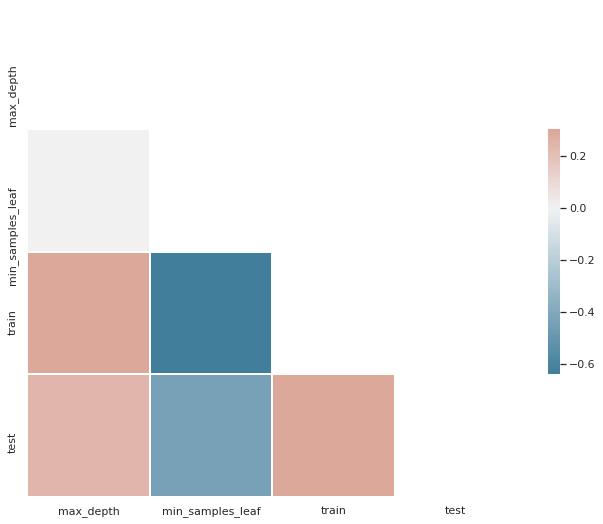

In [70]:

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


In [78]:
#testando hiper parametros 3 dimensões
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33): 
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "min_samples_leaf", "train", "test", "fit_time", "score_time"])
  return resultados
resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_leaf,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.006455,0.001664
1,1,32,64,75.791169,75.784219,0.006000,0.001457
2,1,32,128,75.791169,75.784219,0.005930,0.001727
3,1,32,256,75.791169,75.784219,0.005872,0.001446
4,1,64,32,75.791169,75.784219,0.006062,0.001517


In [79]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,min_samples_leaf,train,test,fit_time,score_time
max_depth,1.000000,0.000000,0.000000,0.529391,0.011529,0.581262,0.161452
min_samples_leaf,0.000000,1.000000,0.000000,-0.341222,0.286555,-0.521401,-0.232380
min_samples_leaf,0.000000,0.000000,1.000000,-0.126171,0.132827,-0.058620,-0.018475
train,0.529391,-0.341222,-0.126171,1.000000,0.247850,0.901397,0.365744
test,0.011529,0.286555,0.132827,0.247850,1.000000,-0.023328,0.039361
fit_time,0.581262,-0.521401,-0.058620,0.901397,-0.023328,1.000000,0.390469
score_time,0.161452,-0.232380,-0.018475,0.365744,0.039361,0.390469,1.000000


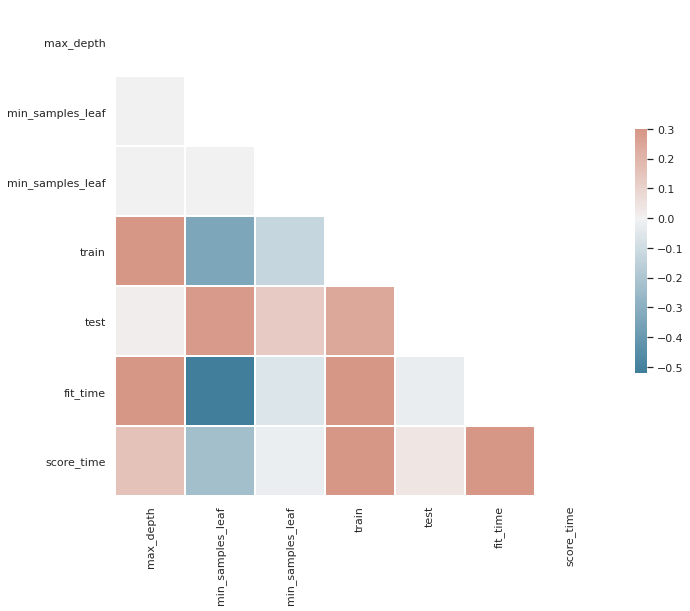

In [80]:

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [81]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_leaf,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.012699,0.001803
48,4,32,32,78.750993,78.672633,0.012846,0.001684
34,3,32,128,78.750993,78.672633,0.011036,0.001531
35,3,32,256,78.750993,78.672633,0.011691,0.001711
36,3,64,32,78.750993,78.672633,0.010851,0.001561


In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv = GroupKFold(n_splits=10))
busca.fit(x_azar, y_azar, groups= dados.modelo)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011614,0.000946,0.001862,0.000677,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.010932,0.000415,0.001502,0.000058,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.010697,0.000257,0.001540,0.000092,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.010676,0.000393,0.001543,0.000299,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.011056,0.000359,0.001555,0.000153,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [87]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [89]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [91]:
from sklearn.metrics import accuracy_score

In [96]:
# evitar essa abordagem pois estará sendo otimista
predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar)
print("Acurácia para os dados foi: %.2f%%" % (accuracy * 100))

Acurácia para os dados foi: 78.75%


In [103]:
#estimativa sem o vício de dados já vistos. Usar o nested cross validation
from sklearn.model_selection import cross_val_score, KFold

In [104]:
#scores = cross_val_score(busca, x_azar, y_azar, cv= GroupKFold(n_splits=10), groups=dados.modelo)
#não dá pra usar groupKFold por conta de um bug do pandas

#usando KFold normal

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv = KFold(n_splits=5, shuffle=True))
busca.fit(x_azar, y_azar)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009841,0.000365,0.001580,0.000067,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.009724,0.000126,0.001605,0.000070,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.009790,0.000270,0.001600,0.000093,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.010063,0.000876,0.001579,0.000051,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.010623,0.001990,0.001850,0.000400,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [107]:
scores = cross_val_score(busca, x_azar, y_azar, cv= KFold(n_splits=5, shuffle=True))
scores

array([0.788 , 0.7865, 0.7925, 0.783 , 0.784 ])

In [108]:
def imprime_scores(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [109]:
imprime_scores(scores)

Accuracy médio 78.68
Intervalo [78.01, 79.35]


In [111]:
melhor = busca.best_estimator_ 
melhor

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

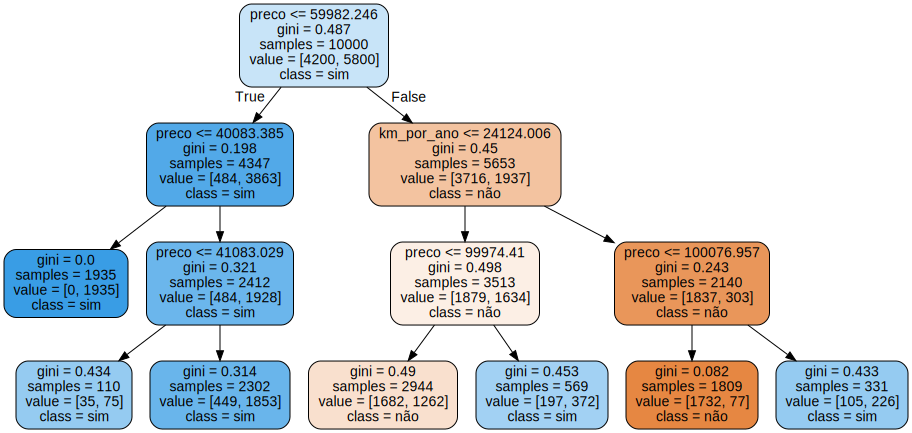

In [113]:
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names=features)

graph = graphviz.Source(dot_data)
graph